# Milestone
Project Members: Owen LaReaux, Jiayu Yang, Kevin Graves
<br> Author: Owen LaReaux, Jiayu Yang

# The Initial Anaylsis
NOTE: The bottom of this notebook contains the peer feedback information obtained during the feedback portion of the class.

For the beginning of this project, we initially had planned to examine how different factors such as inflation, faculty salary, and student fees among others, we're bad inidcators of predicting tuition. The initial hypothesis was that univiersities have been increasing their tuition each year, and that a large portion of this money did not seem to accurately portray the benefit to the students.

To look more into this, an introductory analysis was done on data provided by the US government that showed The average cost of tuition in the US.

This original source of this data can be found here.
https://nces.ed.gov/fastfacts/display.asp?id=76

,All institutions,Dollars,Percent_Change0,Public institutions,Dollars.1,Percent_Change1,Private nonprofit and for-profit institutions,Dollars.2,Percent_Change2
0,1995,10330,0.000000,1995,7014,0.000000,1995,17612,0.000000
1,2000,12922,25.091965,2000,8653,23.367551,2000,21856,24.097206
2,2001,13639,5.548677,2001,9196,6.275280,2001,22896,4.758419
3,2002,14439,5.865533,2002,9787,6.426707,2002,23787,3.891509
4,2003,15505,7.382783,2003,10674,9.063043,2003,25070,5.393702
5,2004,16510,6.481780,2004,11426,7.045156,2004,26260,4.746709
6,2005,17451,5.699576,2005,12108,5.968843,2005,27333,4.086062
7,2006,18471,5.844937,2006,12797,5.690453,2006,28919,5.802510
8,2007,19363,4.829192,2007,13429,4.938657,2007,30226,4.519520
9,2008,20409,5.402055,2008,14262,6.202994,2008,31273,3.463905


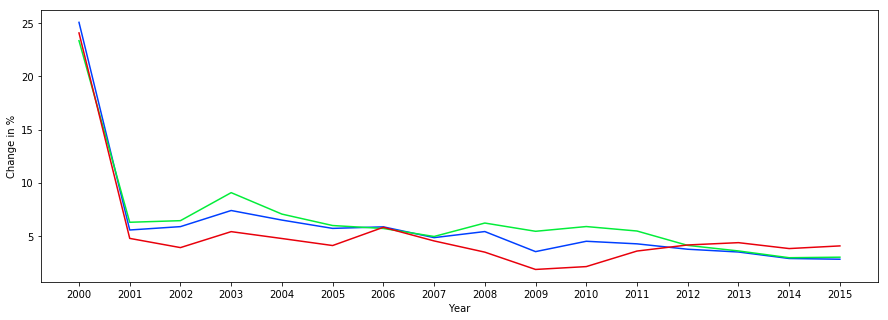

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
plt.style.use('seaborn-bright')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (15, 5)

# This is the CSV file provided by the website.
tuition_data = pd.read_csv('data_files/fouryeartuitionrates.csv')

# Calculates the percent change between years, and inserts into a dataframe
def add_percent_change(dollars_column, dollars_type):
    percent_change_list = [0]
    for i in range(len(tuition_data[dollars_column])-1):
        old_value = tuition_data[dollars_column][i]
        new_value = tuition_data[dollars_column][i+1]
        percent_change = ((new_value - old_value) / old_value) * 100
        percent_change_list.append(percent_change)

    tuition_data.insert(dollars_type*3 + 2, "Percent_Change" + str(dollars_type), percent_change_list)    

# Adding the percent change to each type of institution, 0 = All, 1 = Public, 2 = Pivate and for profit
add_percent_change("Dollars", 0)
add_percent_change("Dollars.1", 1)
add_percent_change("Dollars.2", 2)

# Changing dates to show start date, (end date is implicit)
def clean_dates(df, column):
    for i in range(len(df)):
        df.replace(df.iloc[i][column], str(df.iloc[i][column])[:4], inplace=True)
    return df


tuition_data = clean_dates(tuition_data, 0)
plt.plot(tuition_data.iloc[1:,0], tuition_data.iloc[1:,2])
plt.plot(tuition_data.iloc[1:,0], tuition_data.iloc[1:,5])
plt.plot(tuition_data.iloc[1:,0], tuition_data.iloc[1:,8])
plt.xlabel("Year")
plt.ylabel("Change in %")
tuition_data

The focus of this analysis was to check for trends among the tuition. I had assumed that tuition would be going up each year, so I wanted to check this more thoroughly. I also wanted to compare how inflation was changing over time, to see if there was any obvious relations or a specific period of time to look at.

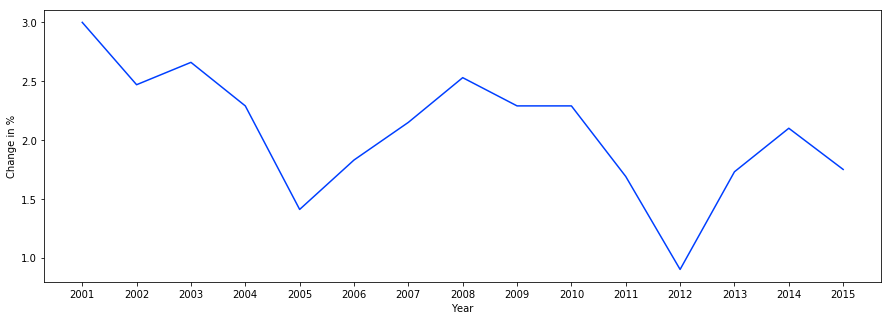

In [10]:
# Looking at inflation
inflation_rates = pd.read_csv('data_files/inflationrates.csv')

# Creating a new column for average inflation rates using the monthly rates for that year
average_inflation = []
for i in range(len(inflation_rates.iloc[2:,0])):
    average_inflation.append(round(np.mean(inflation_rates.iloc[i,2:13]),2))
    
# Plotting the inflation rates by year
inflation_rates['Year'] = inflation_rates['Year'].astype(str)
plt.plot(inflation_rates.iloc[2:,0], average_inflation)
plt.xlabel("Year")
plt.ylabel("Change in %")

average_inflation = np.array(average_inflation)

It should also be noted that in the data provided, the times between 1996 to 2000 were not included for some reason. I chose to limit this data to represent 2001 to 2015 to see the local trend as not enough data was provided.

In [11]:
# Adding the inflation rates column to our main dataframe, and remove dates before 2001
tuition_data = tuition_data.join(inflation_rates)
tuition_data = tuition_data.iloc[2:,:]
tuition_data['Average_Inflation'] = average_inflation

The variables in the original dataframe contained spaces, different capitalization, and non-standard characters. I decided that it would be easier to handle these variables in they were in the standard python styling.

In [12]:
# Cleaning variable names
new_names = []
for col_name in tuition_data.columns:
    new_name = col_name.replace(" ", "_")
    new_name = new_name.replace(".","")
    new_name = new_name.lower()
    new_names.append(new_name)

tuition_data.columns = new_names

# Changing all datatypes to be ints and floats
tuition_data["all_institutions"] = pd.to_numeric(tuition_data["all_institutions"])
tuition_data["all_institutions"] = pd.to_numeric(tuition_data["all_institutions"])
tuition_data["public_institutions"] = pd.to_numeric(tuition_data["public_institutions"])
tuition_data["private_nonprofit_and_for-profit_institutions"] = pd.to_numeric(tuition_data["private_nonprofit_and_for-profit_institutions"])
tuition_data["year"] = pd.to_numeric(tuition_data["year"])

In [13]:
tuition_data.dtypes

all_institutions                                   int64
dollars                                            int64
percent_change0                                  float64
public_institutions                                int64
dollars1                                           int64
percent_change1                                  float64
private_nonprofit_and_for-profit_institutions      int64
dollars2                                           int64
percent_change2                                  float64
year                                               int64
jan                                              float64
feb                                              float64
mar                                              float64
apr                                              float64
may                                              float64
jun                                              float64
jul                                              float64
aug                            

Here the cleaned data is plotted all on one plot to provide an overview of changes for public, private non-proft and for profit schools and tuition to see if this was a direction that we could go with this project.

The average change in tuition for all institutions overtime is 5.46%.
The average change in inflation over time is 2.07%.


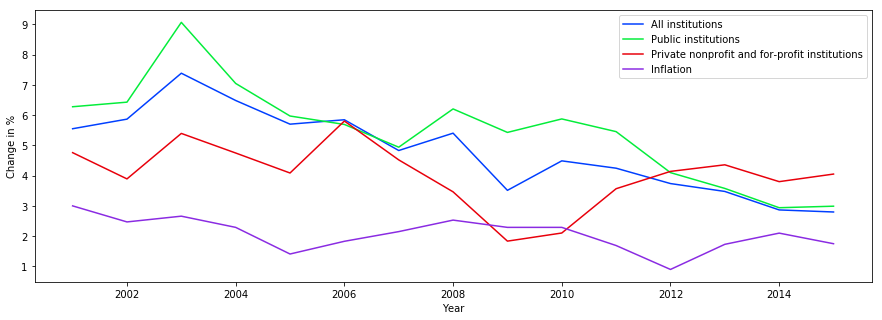

In [14]:
# Plotting the cleaned data to look at trends.
plt.plot(tuition_data.iloc[:,0], tuition_data.iloc[:,2]) # All institutions for 2000 - 2015
plt.plot(tuition_data.iloc[:,0], tuition_data.iloc[:,5]) # All Public institutions for 2000 - 2015
plt.plot(tuition_data.iloc[:,0], tuition_data.iloc[:,8]) # All private and for profit for 2000 - 2015
plt.plot(tuition_data.iloc[:,0], tuition_data.iloc[:,-1])
labels = ['All institutions', 'Public institutions', 'Private nonprofit and for-profit institutions', 'Inflation']
plt.legend(labels)
plt.xlabel("Year")
plt.ylabel("Change in %")

print("The average change in tuition for all institutions overtime is ", 
      round(np.mean(tuition_data["percent_change1"]), 2), "%.", sep="")
print("The average change in inflation over time is ", 
      round(np.mean(tuition_data["average_inflation"]), 2), "%.", sep="")

# Examining Trends
Even though we can clearly see tuition grows at a much faster rate than tuition, it had seemed this trend was actually becoming smaller and smaller overtime. I decided to run a regression test to see what these trend lines would look like.

Text(0,0.5,'Change in %')

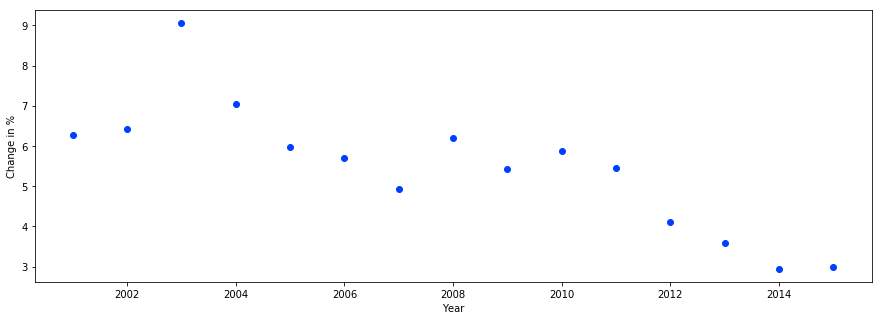

In [15]:
# Comparing National Tuition to Inflation
plt.scatter(tuition_data['year'], tuition_data['percent_change1']);
plt.xlabel("Year")
plt.ylabel("Change in %")

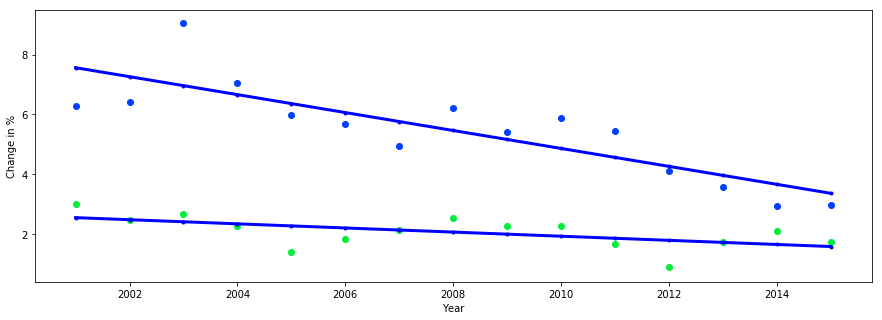

In [16]:
# Showing OLS for inflation rates and tuition rates
inflation_ols = smf.ols(formula="percent_change1 ~ year", data=tuition_data).fit()
plt.scatter(tuition_data['year'], tuition_data['percent_change1'])
plt.plot(tuition_data['year'], inflation_ols.predict(), color='blue',linewidth=3, marker=".")

inflation_ols = smf.ols(formula="average_inflation ~ year", data=tuition_data).fit()
plt.scatter(tuition_data['year'], tuition_data['average_inflation'])
plt.plot(tuition_data['year'], inflation_ols.predict(), color='blue',linewidth=3, marker=".");
plt.xlabel("Year")
plt.ylabel("Change in %");

As we can see here, these values both seemed to be trending closer together, and have been lessening over time.
Unfortunately, this began to raise concerns about the depth of the project, as my initial concerns may have only been related to the University of Utah. We were unable to locate any public data that was provided by a credible source for free to track these data for the University of Utah. I decided to look at the current data for schools in the US to find any interesting relations to explore futher.

# The College Score Card Data
These data were taken from the website https://collegescorecard.ed.gov/

This information includes information provided to the US government relating to things such as tuition cost, average salary after graduation, and graduation rates. Originally, I did not see where the data was stored, so I began to scrape the data off the page to do a breif anaylsis over some of these values.

Unfortunately, the page was not so easy to work with. The page was comprised of many different scripts which altered the DOM and also the HTML. For this reason, I spent some time learning a library called Selenium which allows the page to be loaded as if a user was accessing the page. This allowed for me to wait for the DOM to be loaded and all of the HTML elements changed, so that I could use Beautiful Soup to scrape the information that I thought was important off of the main webpage.

In [42]:
# Scraping for collegescorecard
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.firefox.options import Options
from bs4 import BeautifulSoup
import time

# Removes the driver to open Gecko, removing the need for all gecko elements to be loaded in RAM resulting
# in a quicker more light-weight approach.
options = Options()
options.headless = True

firefox2 = webdriver.Firefox(options = options)
firefox2.get("https://collegescorecard.ed.gov/search/?size=large&control=public&sort=salary:desc&page=0")
time.sleep(2)
html = firefox2.page_source

score_card_soup = BeautifulSoup(html, 'html.parser')

In [43]:
# Creating series to use in creating a dataframe with the information that I deem important
average_cost    = score_card_soup.find_all('span',{'data-bind': 'average_cost'})
graduation_rate = score_card_soup.find_all('span',{'data-bind': 'grad_rate'})
average_salary  = score_card_soup.find_all('span',{'data-bind': 'average_salary'})
num_students    = score_card_soup.find_all('span',{'data-bind': 'size_number'})

print(average_salary[0].get_text())
costs      = [x.get_text() for x in average_cost]
grad_rates = [x.get_text() for x in graduation_rate]
salaries   = [x.get_text() for x in average_salary]
students   = [x.get_text() for x in num_students]

# A basic look at the text, to verify we are gathering the correct elements
print(costs)
print()
print(grad_rates)
print()
print(salaries)
print()
print(students)


$66,900
['$18,845', '$14,468', '$14,897', '$16,928', '$19,413', '$18,243', '$19,177', '$13,572', '$14,775', '$19,479', '$21,223', '$13,712', '$15,309', '$18,422', '$15,440', '$20,166', '$12,957', '$13,467', '$16,736', '$20,036']

['78%', '92%', '91%', '86%', '84%', '85%', '94%', '91%', '87%', '70%', '83%', '88%', '85%', '80%', '80%', '80%', '84%', '70%', '80%', '82%']

['$66,900', '$64,700', '$63,400', '$62,900', '$62,500', '$61,500', '$61,200', '$60,700', '$59,900', '$59,900', '$58,400', '$58,400', '$58,200', '$58,200', '$58,000', '$57,900', '$57,700', '$57,600', '$57,000', '$56,600']

['20,367', '29,309', '28,761', '27,864', '25,725', '32,752', '15,963', '30,859', '28,121', '23,179', '19,030', '27,317', '29,358', '39,676', '50,416', '35,782', '29,831', '16,863', '18,510', '19,262']


In [44]:
# As most of these tags included some non-numerical character, we remove the characters to convert 
# Columns into numerical values for use in analysis

# Removes characters
def clean_list(list_of_integers):
    """Removes all non integer characters from element in list"""
    for element in list_of_integers:
        list_of_integers[list_of_integers.index(element)] = ''.join(c for c in element if c.isdigit())
    return list_of_integers

costs_cleaned      = clean_list(costs)
grad_rates_cleaned = clean_list(grad_rates)
salaries_cleaned   = clean_list(salaries)
students_cleaned   = clean_list(students)

print(costs_cleaned, grad_rates_cleaned, salaries_cleaned, students_cleaned)

['18845', '14468', '14897', '16928', '19413', '18243', '19177', '13572', '14775', '19479', '21223', '13712', '15309', '18422', '15440', '20166', '12957', '13467', '16736', '20036'] ['78', '92', '91', '86', '84', '85', '94', '91', '87', '70', '83', '88', '85', '80', '80', '80', '84', '70', '80', '82'] ['66900', '64700', '63400', '62900', '62500', '61500', '61200', '60700', '59900', '59900', '58400', '58400', '58200', '58200', '58000', '57900', '57700', '57600', '57000', '56600'] ['20367', '29309', '28761', '27864', '25725', '32752', '15963', '30859', '28121', '23179', '19030', '27317', '29358', '39676', '50416', '35782', '29831', '16863', '18510', '19262']


In [45]:
college_score_card_df = pd.DataFrame({"Average_Costs"  : costs_cleaned,
                                      "Graduation_Rate": grad_rates_cleaned,
                                      "Salary_After_Attending": salaries_cleaned,
                                      "Students": students_cleaned})
college_score_card_df

,Average_Costs,Graduation_Rate,Salary_After_Attending,Students
0,18845,78,66900,20367
1,14468,92,64700,29309
2,14897,91,63400,28761
3,16928,86,62900,27864
4,19413,84,62500,25725
5,18243,85,61500,32752
6,19177,94,61200,15963
7,13572,91,60700,30859
8,14775,87,59900,28121
9,19479,70,59900,23179


In [46]:
# Redefining the function here just for organizational purposes.
def clean_list(list_of_integers):
    """Removes all non integer characters from element in list"""
    for element in list_of_integers:
        list_of_integers[list_of_integers.index(element)] = ''.join(c for c in element if c.isdigit())
    return list_of_integers

def convert_page_to_df(url):
    """Converts page of college score card to a pandas df"""
    
    options = Options()
    options.headless = True
    
    firefox = webdriver.Firefox(options = options)
    firefox.get(url)
    time.sleep(1)
    
    html = firefox.page_source
    firefox.quit()
    
    score_card_soup = BeautifulSoup(html, 'html.parser')
    
    average_cost    = score_card_soup.find_all('span',{'data-bind': 'average_cost'})
    graduation_rate = score_card_soup.find_all('span',{'data-bind': 'grad_rate'})
    average_salary  = score_card_soup.find_all('span',{'data-bind': 'average_salary'})
    num_students    = score_card_soup.find_all('span',{'data-bind': 'size_number'})
    college_name    = score_card_soup.find_all('a',   {'class': 'link'})
    state_name      = score_card_soup.find_all('span',{'data-bind': 'state'})
    city_name       = score_card_soup.find_all('span',{'data-bind': 'city'})
        
    costs      = [x.get_text() for x in average_cost]
    grad_rates = [x.get_text() for x in graduation_rate]
    salaries   = [x.get_text() for x in average_salary]
    students   = [x.get_text() for x in num_students]
    colleges   = [x.get_text() for x in college_name]
    states     = [x.get_text() for x in state_name]
    cities     = [x.get_text() for x in city_name]
    
    costs_cleaned      = clean_list(costs)
    grad_rates_cleaned = clean_list(grad_rates)
    salaries_cleaned   = clean_list(salaries)
    students_cleaned   = clean_list(students)
    
    # The tag included a \n character as another element, 
    # so we just add all of the values with actual college names
    colleges_cleaned   = []
    for college in colleges:
        if colleges.index(college) % 2 == 0:
            colleges_cleaned.append(college)
    
    
    college_score_card_df = pd.DataFrame({"college": colleges_cleaned,
                                          "state": states,
                                          "city": cities,
                                          "average_costs"  : costs_cleaned,
                                          "graduation_rate": grad_rates_cleaned,
                                          "salary_after_attending": salaries_cleaned,
                                          "students": students_cleaned})
    
    college_score_card_df["average_costs"] = pd.to_numeric(college_score_card_df["average_costs"])
    college_score_card_df["graduation_rate"] = pd.to_numeric(college_score_card_df["graduation_rate"])
    college_score_card_df["salary_after_attending"] = pd.to_numeric(college_score_card_df["salary_after_attending"])
    college_score_card_df["students"] = pd.to_numeric(college_score_card_df["students"])
    
    return college_score_card_df

In [47]:
# Testing out append function
final_df = convert_page_to_df("https://collegescorecard.ed.gov/search/?size=large&sort=salary:desc&page=0")

second_df = convert_page_to_df("https://collegescorecard.ed.gov/search/?control=public&sort=salary:desc&page=0")

final_df = final_df.append(second_df, ignore_index=True)
final_df.to_csv("data_files/college_score_card.csv", index=False)

final_df

,college,state,city,average_costs,graduation_rate,salary_after_attending,students
0,University of Southern California,CA,Los Angeles,29977.0,92.0,74000,18557
1,Drexel University,PA,Philadelphia,36050.0,69.0,68800,15350
2,California Polytechnic State University-San Lu...,CA,San Luis Obispo,18845.0,78.0,66900,20367
3,Boston University,MA,Boston,34914.0,86.0,65300,16512
4,University of California-Berkeley,CA,Berkeley,14468.0,92.0,64700,29309
5,University of Michigan-Ann Arbor,MI,Ann Arbor,14897.0,91.0,63400,28761
6,University of Maryland-College Park,MD,College Park,16928.0,86.0,62900,27864
7,Virginia Polytechnic Institute and State Unive...,VA,Blacksburg,19413.0,84.0,62500,25725
8,American Public University System,WV,Charles Town,11262.0,37.0,62400,37826
9,New York University,NY,New York,37362.0,84.0,61900,25716


With most of the scraping done, me and Jiayu decided that we only wanted to examine data for public schools with more than 2000 undergraduates students as many schools did not have enough data. One of the downsides of using selenium is that there is quite a bit of overhead, and waiting for pages to load which makes the retreivial of this data much more time consuming.

In [49]:
# Creating the main dataframe


# Page 1 of the main dataframe, using the public schools with over 2000 undergraduate students for the parameters
schools_df = convert_page_to_df("https://collegescorecard.ed.gov/search/?degree=b&size=medium&size=large&control=public&sort=salary:desc&page=0")

# Pages 2-29
for i in range(1,30):
        start_time = time.time()
        print("Gathering data for page " + str(i) + ".")
        schools_df = schools_df.append(convert_page_to_df("https://collegescorecard.ed.gov/search/?degree=b&size=medium&size=large&control=public&sort=salary:desc&page=" + str(i)), ignore_index=True)
        end_time = time.time()
        print("Finished gather data for page " + str(i) + ". " + "Took: " + str(end_time - start_time) + " seconds.")

print("Saving to csv...")
schools_df.to_csv("data_files/scraped_school_info.csv")
print("Saved.")

schools_df

Gathering data for page 1.
Finished gather data for page 1. Took: 4.576051235198975 seconds.
Gathering data for page 2.
Finished gather data for page 2. Took: 5.863587856292725 seconds.
Gathering data for page 3.
Finished gather data for page 3. Took: 4.73002815246582 seconds.
Gathering data for page 4.
Finished gather data for page 4. Took: 4.677824974060059 seconds.
Gathering data for page 5.
Finished gather data for page 5. Took: 5.819102048873901 seconds.
Gathering data for page 6.
Finished gather data for page 6. Took: 6.789013385772705 seconds.
Gathering data for page 7.
Finished gather data for page 7. Took: 6.754146337509155 seconds.
Gathering data for page 8.
Finished gather data for page 8. Took: 5.924861192703247 seconds.
Gathering data for page 9.
Finished gather data for page 9. Took: 5.724995374679565 seconds.
Gathering data for page 10.
Finished gather data for page 10. Took: 6.059471607208252 seconds.
Gathering data for page 11.
Finished gather data for page 11. Took: 6

,college,state,city,average_costs,graduation_rate,salary_after_attending,students
0,Colorado School of Mines,CO,Golden,27013.0,77.0,84900.0,4564.0
1,Georgia Institute of Technology-Main Campus,GA,Atlanta,11639.0,86.0,79100.0,14766.0
2,Missouri University of Science and Technology,MO,Rolla,14303.0,65.0,71200.0,6857.0
3,New Jersey Institute of Technology,NJ,Newark,18544.0,61.0,68500.0,7336.0
4,California Polytechnic State University-San Lu...,CA,San Luis Obispo,18845.0,78.0,66900.0,20367.0
5,Michigan Technological University,MI,Houghton,14638.0,66.0,66400.0,5739.0
6,University of California-Berkeley,CA,Berkeley,14468.0,92.0,64700.0,29309.0
7,University of Michigan-Ann Arbor,MI,Ann Arbor,14897.0,91.0,63400.0,28761.0
8,University of Maryland-College Park,MD,College Park,16928.0,86.0,62900.0,27864.0
9,Virginia Polytechnic Institute and State Unive...,VA,Blacksburg,19413.0,84.0,62500.0,25725.0


In [50]:
# Opening CSV that was saved
csv_data = pd.read_csv("data_files/scraped_school_info.csv", index_col=0)
schools_df = pd.DataFrame(csv_data)

schools_df["average_costs"] = pd.to_numeric(schools_df["average_costs"])
schools_df["graduation_rate"] = pd.to_numeric(schools_df["graduation_rate"])
schools_df["salary_after_attending"] = pd.to_numeric(schools_df["salary_after_attending"])
schools_df["students"] = pd.to_numeric(schools_df["students"])

# Changing all empty values to NaN values
schools_df.replace(r'\s+', np.nan, regex=True)

schools_df.dtypes

college                    object
state                      object
city                       object
average_costs             float64
graduation_rate           float64
salary_after_attending    float64
students                  float64
dtype: object

In [51]:
# Looking at our school for a breif look.
schools_df.groupby("state").describe()
schools_df[schools_df["college"] == "University of Utah"]

,college,state,city,average_costs,graduation_rate,salary_after_attending,students
56,University of Utah,UT,Salt Lake City,12674.0,65.0,53000.0,22748.0


# Examining the Scraped Data
After I had scraped all of the data I needed, and saving everything into a CSV file, it was time to look for some interesting relations. I was particularly interested in seeing what the salary after graduation was for these schools.

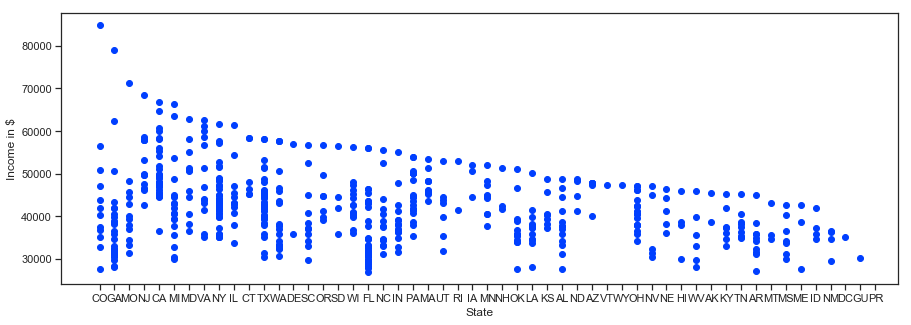

In [52]:
plt.scatter(schools_df['state'], schools_df['salary_after_attending']);
plt.xlabel("State")
plt.ylabel("Income in $");

There seemed to be some strange relation with the expected salary after graduation, and state with a seeminly converging function. I assumed that this was most likely due to regional costs of living being lower in some areas. However, Colorado surprised me as it offeres the most while being in a relatively affordable area.

I decided to continue analysing different trends instead of diving to deep on this specific relation, to get a broader sense of the data.

In [53]:
print(schools_df.columns)

Index(['college', 'state', 'city', 'average_costs', 'graduation_rate',
       'salary_after_attending', 'students'],
      dtype='object')


There is a correlation coefficient of 0.5571772482694848 between graduation rate and average costs of tuition.


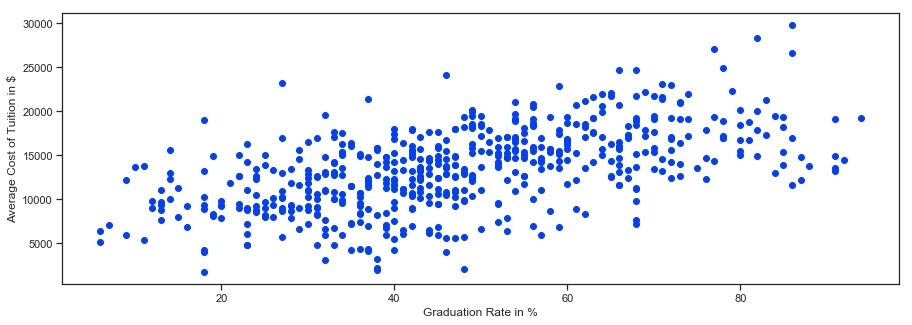

In [54]:
corr_value = schools_df['graduation_rate'].corr(schools_df['average_costs'])
print("There is a correlation coefficient of ", corr_value, " between graduation rate and average costs of tuition.",
     sep="")
plt.scatter(schools_df['graduation_rate'], schools_df['average_costs']);
plt.xlabel("Graduation Rate in %")
plt.ylabel("Average Cost of Tuition in $");

Here I used seaborn to get an overview of the small amount of data I had, looking for anything else that seemed to have a strong correlation.

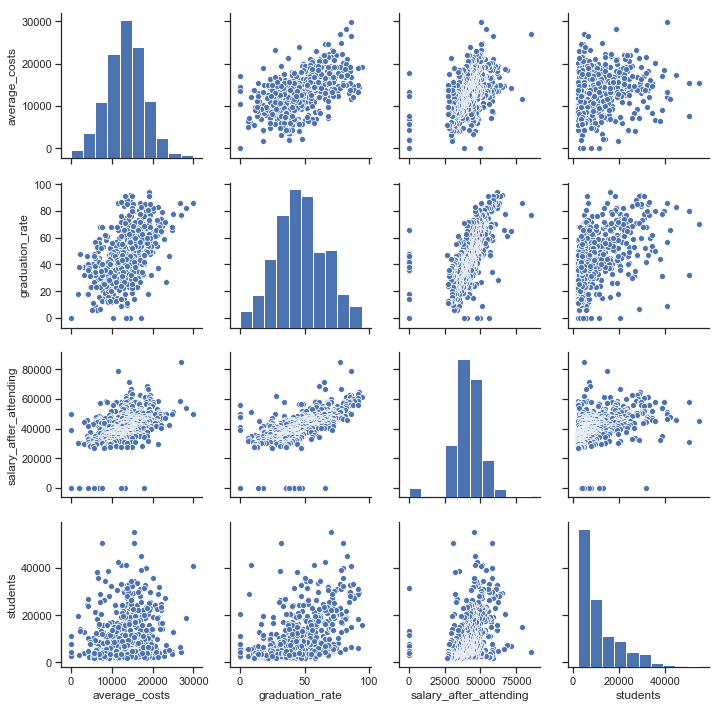

In [55]:
# Using seaborn to look for interesting correlations between the different colleges. 0 values represent NaN where
# no data was available

import seaborn as sns
sns.set(style="ticks")
sns.pairplot(schools_df.fillna(0));

# Deviations
Jiayu and I spoke to Anatara about the results we found, and we decided that the original idea was most likely not suited for this class, and not feasbile at this time. We decided to deviate from our plan and focus more on  data found in the college score card. A bittersweet moment occured when I found the dataset with much much more data on the college score card website itself. While it was nice that was had so much data to work with, I wasted a lot of time scraping the data myself. 

We spoke with Dr. Lex after our meeting with Anatara to discuss some possibilities to focus more on the machine learning aspect of the class. We decided to work with these data to create an unsupervised learning model to locate some interesting clusters. Our initial hypothesis is that we may be able to find a way to find something like the most cost effecient school or the school that will give you the highest probabiltiy of graduating.

To begin, we are going to take these data and clean them up, and remove extraneous features.

In [17]:
# Loading college scorecard data into a DataFrame
csc_df = pd.DataFrame(pd.read_csv("data_files/Most-Recent-Cohorts-Scorecard-Elements.csv"))
removal = pd.read_csv("data_files/feature_removal_rationale.csv")
print(removal)
csc_df[csc_df['INSTNM'] == 'University of Utah']

  feature_name                                       feature_desc  \
0       UNITID                     Describes the ID of the school   
1        OPEID  Tracks the university's changes\nover time, su...   
2      INSTURL                             The URL of the college   
3       NPCURL  The URL for the university's proprietary tuiti...   

                                      reason_removed  
0  This is only used for located these schools in...  
1  As we are only looking at the current state of...  
2  URL information has no effect on any data we a...  
3  Tuition is already provided in the dataset, so...  


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,INSTURL,NPCURL,HCM2,PREDDEG,...,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GT_28K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
3645,230764,367500,3675,University of Utah,Salt Lake City,UT,www.utah.edu,financialaid.utah.edu/tuition-and-fees/cost-ca...,0,3,...,0.3268,0.2671,53000,0.727,0.706,15000,159.465120117852,0.7180530045,NaN,0.6451


We are removing features that have been deemed irrelevant to our analysis. This information is contained in feature_removal_rationale.csv. We will also be removing schools that are not currently in operation (reported as of October 30th, 2018). We will also be splitting our data into Public (1), Private-Nonprofit (2) and Private For-Profit (3). Any schools with privacy suppressed data will have those values converted to NaN. NaN will either represent missing data, or suppressed data in our analysis.

In [18]:
print(csc_df.shape)
# Removing schools not in current operation
csc_df = csc_df.drop(csc_df[csc_df['CURROPER'] == 0].index)
print(csc_df.shape)

# Replacing PrivacySuppressed with NaN
csc_df = csc_df.replace('PrivacySuppressed', np.nan)
print(csc_df.shape)

# Removing irrelevant features
csc_df = csc_df.drop(csc_df.columns[[0,1,2,6,7]], axis=1)
print(csc_df.shape)

# Converting all numeric columns to numeric type
csc_df.iloc[:,3:] = csc_df[csc_df.iloc[:,3:].columns].apply(pd.to_numeric, errors='coerce')

# Splitting into main groups
public_schools_df = csc_df[csc_df['CONTROL'] == 1]
private2_schools_df = csc_df[csc_df['CONTROL'] == 2]
private3_schools_df = csc_df[csc_df['CONTROL'] == 3]

#Saving to CSV
print("Saving file 1...")
csc_df.to_csv("data_files/BASE_clean_college_score_card_data.csv")
print("Saved.")

print("Saving file 2...")
public_schools_df.to_csv("data_files/PUBLIC_clean_college_score_card_data.csv")
print("Saved.")

print("Saving file 3...")
private2_schools_df.to_csv("data_files/PRIVATE_NO_PROFIT_clean_college_score_card_data.csv")
print("Saved.")

print("Saving file 4...")
private3_schools_df.to_csv("data_files/PRIVATE_PROFIT_clean_college_score_card_data.csv")
print("Saved.")

(7175, 124)
(6692, 124)
(6692, 124)
(6692, 119)
Saving file 1...
Saved.
Saving file 2...
Saved.
Saving file 3...
Saved.
Saving file 4...
Saved.


We are choosing to keep schools with some data restricted, as when want to do some anaylsis we can filter our rows with invalid data. We may remove schools with these values altogether during our clustering later to prevent problems, but for now we want to keep them for analysis.

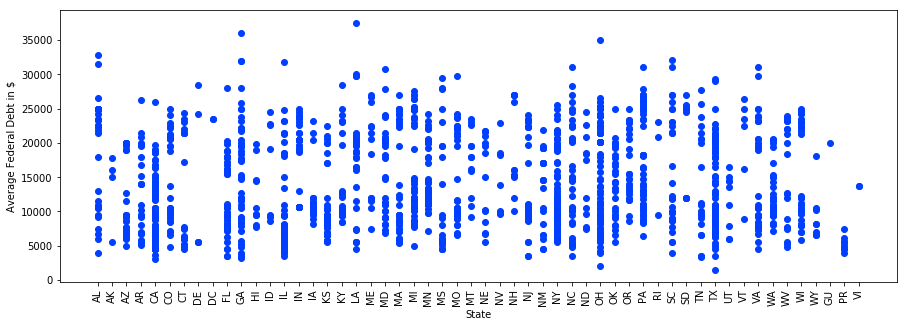

In [19]:
# Example of how to parse data where it's actually 
states   = public_schools_df['STABBR'][public_schools_df['GRAD_DEBT_MDN_SUPP'].notnull()]
earnings = public_schools_df['GRAD_DEBT_MDN_SUPP'][public_schools_df['GRAD_DEBT_MDN_SUPP'].notnull()]
plt.scatter(states, earnings);
plt.xlabel("State")
plt.ylabel("Average Federal Debt in $");
plt.xticks(rotation=90);

In [20]:
# With this new dataset, it is much easier to navigate the features
most_expensive_school = csc_df.loc[csc_df['NPT4_PRIV'].idxmax()]
print("The most expensive school is \"", most_expensive_school['INSTNM'],
      "\" with an average yearly cost of $", most_expensive_school['NPT4_PRIV'], 
      ".",
      sep="")

The most expensive school is "L3 Commercial Training Solutions Airline Academy" with an average yearly cost of $99047.0.


One of our initial ideas conisted of finding the most cost-effective school. While we plan to find something similar in the clusters (hopefully) we can use a basic calculation to show a 'first-look' in how cost effective a school is. We begin by comparing a few schools that my friends had attended with the University of Utah.

In [21]:
wild_v_kazu = pd.read_csv("data_files/subset_for_analysis.csv")
wild_v_kazu

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,INSTURL,NPCURL,HCM2,PREDDEG,...,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GT_28K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
0,230764,367500,3675,University of Utah,Salt Lake City,UT,www.utah.edu,financialaid.utah.edu/tuition-and-fees/cost-ca...,0,3,...,0.3268,0.2671,53000,0.727,0.706,15000,159.465120,0.718053,NaN,0.6451
1,191241,272200,2722,Fordham University,Bronx,NY,www.fordham.edu,www.fordham.edu/finaid/npc,0,3,...,0.5178,0.0696,59200,0.785,0.776,26000,276.406208,0.765188,NaN,0.8006
2,149231,175900,1759,Southern Illinois University-Edwardsville,Edwardsville,IL,www.siue.edu,siue.studentaidcalculator.com/welcome.aspx,0,3,...,0.5746,0.1396,43000,0.706,0.677,21434,227.865026,0.583843,NaN,0.4862


We can then use this data to compare cost effectiveness. This function is complete but verbose output will be added in later versions.

In [83]:
# Creating the base Dataframe
test_df = pd.DataFrame(wild_v_kazu['INSTNM'])

# Appending the values that are associated with calcuating cost effectiveness.
final_df = test_df.join(wild_v_kazu['NPT4_PRIV'])
final_df = final_df.join(wild_v_kazu['NPT4_PUB'])
final_df = final_df.join(wild_v_kazu['MD_EARN_WNE_P10'])
final_df = final_df.join(wild_v_kazu['GRAD_DEBT_MDN_SUPP'])
final_df.iloc[:,1:].fillna(0)

# Getting costs
kazu_cost  = final_df.iloc[0,2]*4 
wild_cost  = final_df.iloc[1,1]*4 
phone_cost = final_df.iloc[2,2]*4

# Gettng estimated earnings
kazu_earnings = final_df.iloc[0,3]
wild_earnings = final_df.iloc[1,3]
phone_earnings= final_df.iloc[2,3]

def calculate_earning_difference(school1, school2, dataframe):
    """Finds the differences in cost effectiveness between school. TODO, create verbose output"""
    earnings1 = dataframe[dataframe['INSTNM'] == school1]['MD_EARN_WNE_P10'].values[0]
    earnings2 = dataframe[dataframe['INSTNM'] == school2]['MD_EARN_WNE_P10'].values[0]
    
    # Find cost of first school
    type_of_school1 = dataframe[dataframe['INSTNM'] == school1]['CONTROL'].values[0]
    type_of_school2 = dataframe[dataframe['INSTNM'] == school2]['CONTROL'].values[0]
    
    if type_of_school1 == 1:
        cost1 = dataframe[dataframe['INSTNM'] == school1]['NPT4_PUB'].values[0]
    else:
        cost1 = dataframe[dataframe['INSTNM'] == school1]['NPT4_PRIV'].values[0]
    
    # Find cost of second school
    if type_of_school2 == 1:
        cost2 = dataframe[dataframe['INSTNM'] == school2]['NPT4_PUB'].values[0]
    else:
        cost2 = dataframe[dataframe['INSTNM'] == school2]['NPT4_PRIV'].values[0]
    
    print(earnings1, earnings2)
    print(cost1, cost2)
    
    cost1 = 4
    cost2 = 2
    
    earnings1 = 1
    earnings2 = 2
    # If the cost of the first school is greater, use the percentage change increase formula
    # Else if the cost of the first school is greater, use the percentage change decrease formula
    # Same goes for earnings
    if cost1 >= cost2:
        cost_difference_percentage = round(((cost1 - cost2)/cost1)*100, 2)
        print('cost1 is greater than cost2')
    else:
        cost_difference_percentage = round(((cost2 - cost1)/cost1)*100, 2)
        
    if earnings1 >= earnings2:
        earnings_difference_percentage = round(((earnings1 - earnings2)/earnings1)*100, 2)
        print('earnings1 is greater than earnings2')
    else:
        earnings_difference_percentage = round(((earnings2 - earnings1)/earnings2)*100, 2)
        

    
    print(cost_difference_percentage,"%",sep="")
    print(earnings_difference_percentage,"%",sep="")

    return cost_difference_percentage, earnings_difference_percentage

u1, u2 = 'Utah State University', 'University of Utah'
calculate_earning_difference(u1, u2, csc_df)
calculate_earning_difference(u2, u1, csc_df)

43200.0 53000.0
12849.0 12674.0
cost1 is greater than cost2
50.0%
50.0%
53000.0 43200.0
12674.0 12849.0
cost1 is greater than cost2
50.0%
50.0%


(50.0, 50.0)

We can also see what degrees are most popular for a given school using barplots.

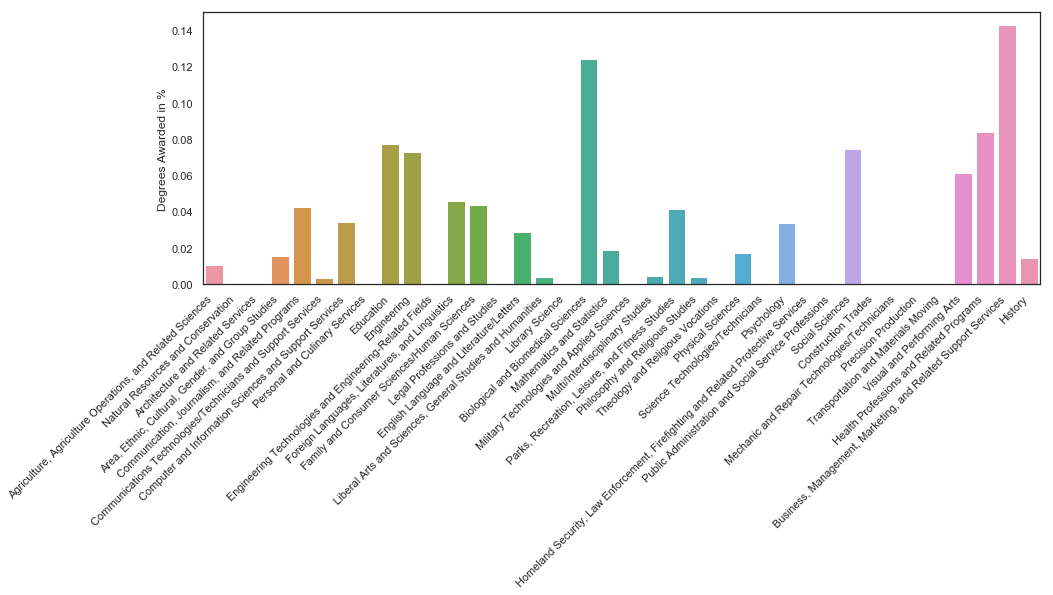

In [108]:
def plot_degrees_awarded_plot(school_name, dataframe):
    """Makes a barplot for all of the degrees awarded for a particular school"""
    
    # Start and end of degree information in datafile
    start = dataframe.columns.get_loc("PCIP01")
    end   = dataframe.columns.get_loc("PCIP54")
    
    # Create a dictionary 
    degrees     = csc_df[csc_df["INSTNM"] == school_name].iloc[:, start:end+1]
    titles      = list(degrees.columns)
    titles2     = ['Agriculture, Agriculture Operations, and Related Sciences',
                     'Natural Resources and Conservation',
                     'Architecture and Related Services',
                     'Area, Ethnic, Cultural, Gender, and Group Studies',
                     'Communication, Journalism, and Related Programs',
                     'Communications Technologies/Technicians and Support Services',
                     'Computer and Information Sciences and Support Services',
                     'Personal and Culinary Services',
                     'Education',
                     'Engineering',
                     'Engineering Technologies and Engineering-Related Fields',
                     'Foreign Languages, Literatures, and Linguistics',
                     'Family and Consumer Sciences/Human Sciences',
                     'Legal Professions and Studies',
                     'English Language and Literature/Letters',
                     'Liberal Arts and Sciences, General Studies and Humanities',
                     'Library Science',
                     'Biological and Biomedical Sciences',
                     'Mathematics and Statistics',
                     'Military Technologies and Applied Sciences',
                     'Multi/Interdisciplinary Studies',
                     'Parks, Recreation, Leisure, and Fitness Studies',
                     'Philosophy and Religious Studies',
                     'Theology and Religious Vocations',
                     'Physical Sciences',
                     'Science Technologies/Technicians',
                     'Psychology',
                     'Homeland Security, Law Enforcement, Firefighting and Related Protective Services',
                     'Public Administration and Social Service Professions',
                     'Social Sciences',
                     'Construction Trades',
                     'Mechanic and Repair Technologies/Technicians',
                     'Precision Production',
                     'Transportation and Materials Moving',
                     'Visual and Performing Arts',
                     'Health Professions and Related Programs',
                     'Business, Management, Marketing, and Related Support Services',
                     'History']
    percentages = degrees.values.tolist()[0]

    degree_data = {'title':titles2, 'percentages':percentages}
    degrees_awarded_barplot = sns.barplot(x='title', y='percentages', data=degree_data)
    plt.xticks(rotation=45,ha='right')
    plt.ylabel("Degrees Awarded in %")
    return None

plot_degrees_awarded_plot("Brigham Young University-Provo", csc_df)

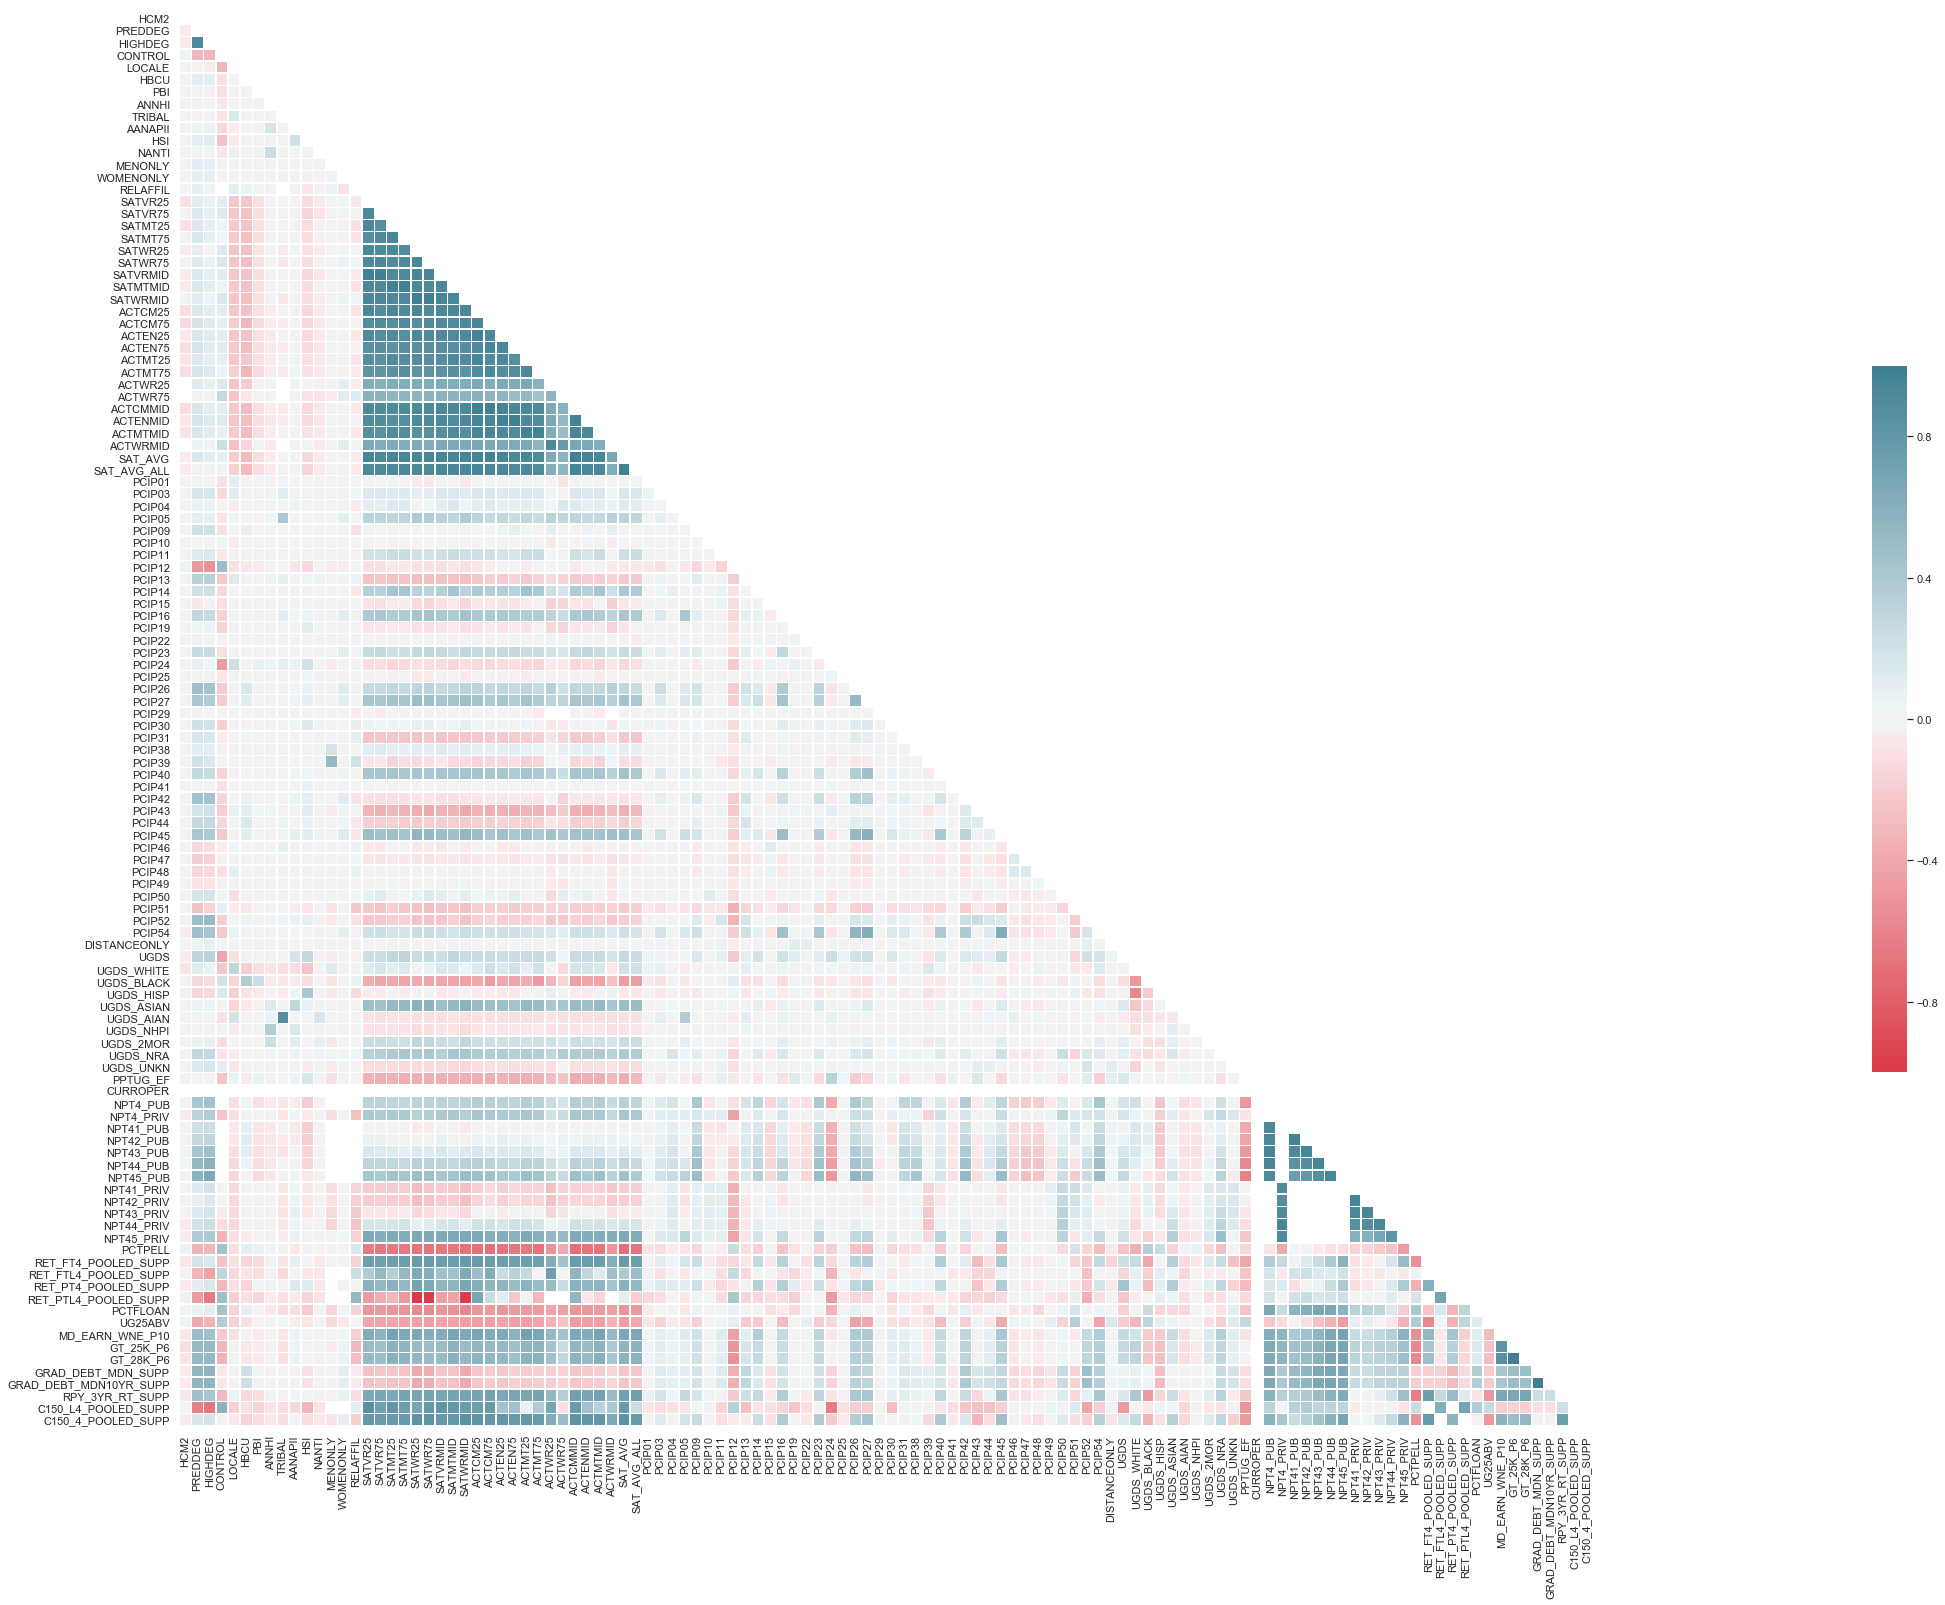

In [109]:
# Using seaborn's boilerplate code to make a heatmap of the correlation matrix
sns.set(style="white")

# Generate a large random dataset
csc_corr_df = csc_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(csc_corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=d.shape)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(csc_corr_df, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Jiayu had done an analysis on the number of schools per state. These may affect costs as there more options for the area, and more competition. This is also most likely going to be a very strong factor when looking for clusters as the state policies and economics affect education very heavily.

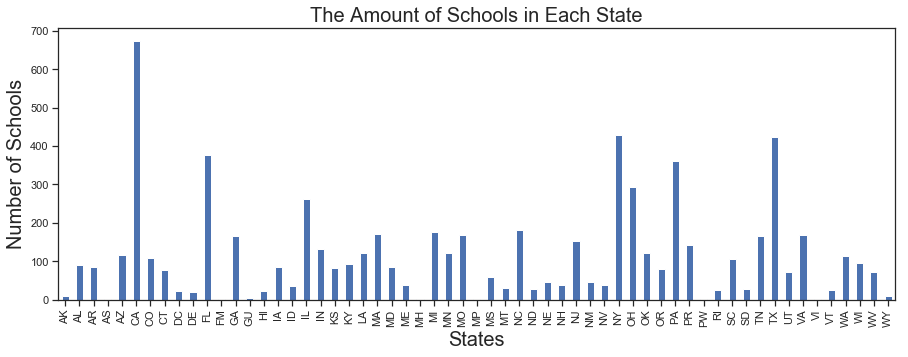

In [63]:
num_of_school = csc_df.groupby('STABBR').size()
ax = num_of_school.plot(kind="bar")
ax.set_title("The Amount of Schools in Each State", fontsize=20)
ax.set_ylabel("Number of Schools", fontsize=20)
ax.set_xlabel("States", fontsize=20)
plt.show()

# Project Peer Feedback

During the peer review session in class, we spoke with team Evelyn Lauren and Camille Humphries. Their project was: "Predicting mental Health symptoms from other health data and lifestyles status". Unfortunately most of the information we discussed is no longer relevant as we had changed our project scope after speaking with Antara and looking for more interesting work to do.

General Questions for Our Project and the Disccusion
- Are the objectives interesting and suitable for a class project?
  - Their team informed us that while it was, the original project did not seem have much application. We addressed with Antara and changed the scope project. We are now focusing on clustering schools, to find cost effective schools, and the help students find the school that they are most likely to graduate from using machine learning.
- Is the scope of the project appropriate? If not, suggest improvements.
  - This was mentioned previously.
- Is the split between optional and must-have features appropriate? Why?
  - Unfortunately due to the original scope of the project, there was no flexibility. Now that we have changed our project, we will need revist this.
- Is the stakeholder analysis comprehensive? Are there specific ethical issues?
  - Their team informed us that there is an ethical concern in terms of making this information public. If students have any type bias towards which university they will go to, due to our program, then this may affect profits and in turn stakeholder awareness.
Data Acquisition and Cleanup
- Is the data acquisition realistic?
    - Yes.
- Is the data acquisition trivial (e.g., download existing dataset). Does the rest of the
project compensate?
   - The data acquisition was not trivial during our peer review, however it has become so after using the dataset provided by collegescorecard. We are compensating this, but adding more functionality and a deeper analysis of the data.
- What’s the plan for cleanup? Is cleanup that goes beyond what was taught in class
   - The plan we had discussed consisted removing schools with no data, and converting datatypes to fit the analysis. Now, we have simply removed extraneous features from our dataset, as well as schools that are no longer operating.
necessary?
- Is there enough data to accomplish the stated objectives?
    - Yes.
- Are there other variables that are not being modeled that have a strong effect on the
problem?
    - We feel confident that we have enough features to have in-depth analysis. Their team agreed.
Analysis Methodology
- Does the analysis methodology work for the data? E.g., for supervised learning - is the
data labelled?
    - Originally our data did not focus heavily machine learning. For the project we had spoken about with their team, it fit our analysis but neither teamed mentioned any machine learning.
- Would other analysis methods be appropriate?
    - At the time no, the scope was not sufficient. Now we will be unsupervised methodologies.
- Is the scale of the dataset sufficient for the analysis methodology.
    - Yes.

